# Locating Hospitals near the Blackspots identified using Kepler

C:\Users\Thanya\AppData\Local\Temp\ipykernel_18924\1163430765.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  return ox.geometries_from_point(center_point=(lat, lng), tags={"amenity": amenity_type}, dist=distance)
C:\Users\Thanya\AppData\Local\Temp\ipykernel_18924\1163430765.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  return ox.geometries_from_point(center_point=(lat, lng), tags={"amenity": amenity_type}, dist=distance)
C:\Users\Thanya\AppData\Local\Temp\ipykernel_18924\1163430765.py:6: UserWarning: The `geometries` module and `geometries_from_X`

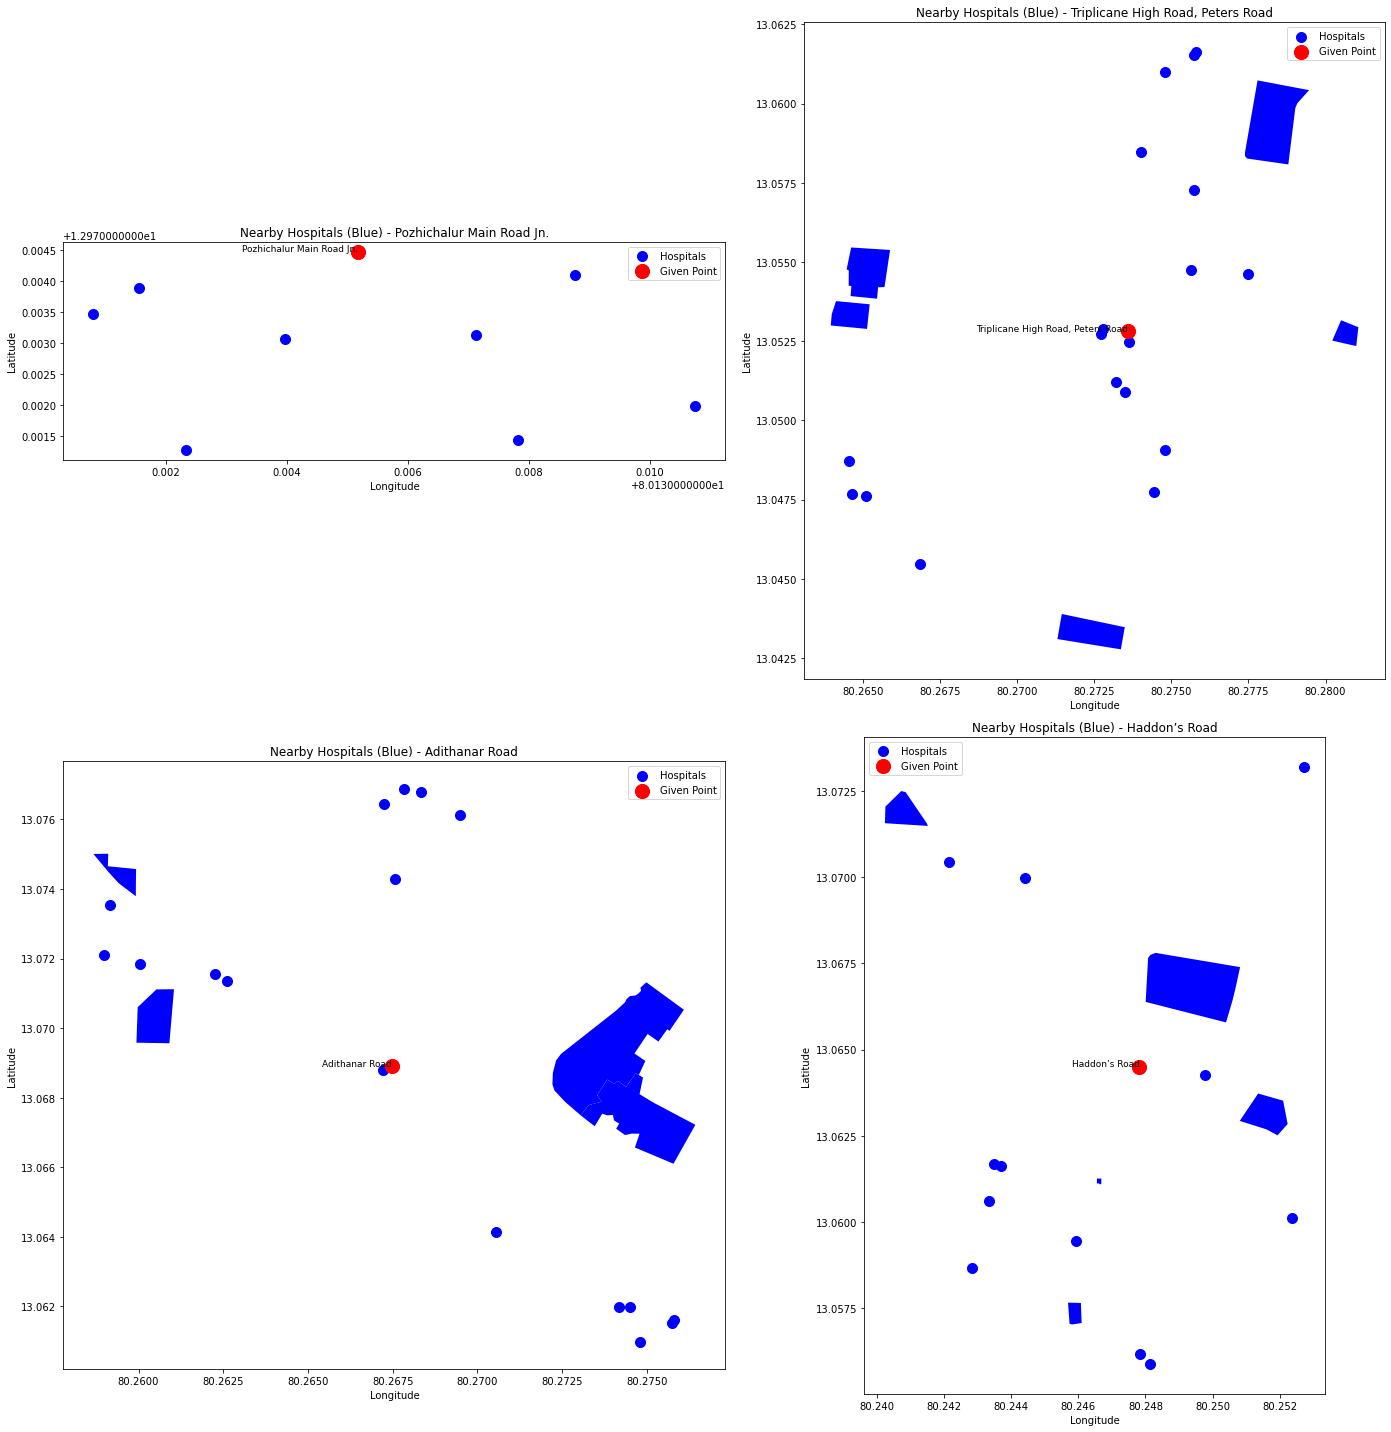

In [21]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def fetch_amenities_nearby(lat, lng, amenity_type, distance=1000):
    return ox.geometries_from_point(center_point=(lat, lng), tags={"amenity": amenity_type}, dist=distance)

def plot_hospitals_on_subplot(ax, lat, lng, gdf_hospitals, location_label):
    gdf_hospitals.plot(ax=ax, color='blue', markersize=100, label="Hospitals")
    ax.scatter(lng, lat, color='red', s=200, label="Given Point")
    ax.text(lng, lat, location_label , color='black', fontsize=9, ha='right')
    ax.set_title(f"Nearby Hospitals (Blue) - {location_label}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()

locations = [
    (12.974474, 80.135178, "Pozhichalur Main Road Jn."),
    (13.052813, 80.273599, "Triplicane High Road, Peters Road"),
    (13.068909, 80.267477, "Adithanar Road"),
    (13.064508, 80.247822, "Haddon’s Road")
]

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()  # Flatten the 2x2 axes array

for i, (lat, lng, label) in enumerate(locations):
    gdf_hospitals = fetch_amenities_nearby(lat, lng, "hospital")
    plot_hospitals_on_subplot(axes[i], lat, lng, gdf_hospitals, label)

plt.tight_layout()
plt.show()


# Analysing patterns of alerts triggered for each vehicle seperately in terms of  what alert gets triggered first followed by what alert

In [24]:
import pandas as pd
df = pd.read_csv('datetime.csv')
unique_vehicles = df['Vehicle'].unique()
vehicles_to_extract = unique_vehicles[:5]
for vehicle in vehicles_to_extract:
    vehicle_df = df[df['Vehicle'] == vehicle]
    vehicle_df.to_csv(f'vehicle_{vehicle}.csv', index=False)
print(f"Extracted data for {len(vehicles_to_extract)} Vehicle.")
data1 = pd.read_csv("vehicle_1995.csv")
data2 = pd.read_csv("vehicle_2846.csv")
data3 = pd.read_csv("vehicle_3143.csv")
data4 = pd.read_csv("vehicle_5339.csv")
data5 = pd.read_csv("vehicle_805.csv")
datasets = [data1, data2, data3, data4, data5]
def get_alert_sequences(data):
    data = data.sort_values(by="Datetime")
    sequences = []
    for i in range(len(data)-1):
        sequences.append(data['Alert'].iloc[i] + ' -> ' + data['Alert'].iloc[i+1])
    return sequences
all_sequences = []
for data in datasets:
    all_sequences.extend(get_alert_sequences(data))

sequence_counts = pd.Series(all_sequences).value_counts()
print(sequence_counts)

from collections import defaultdict
def create_transition_matrix(sequences):
    matrix = defaultdict(lambda: defaultdict(int))
    for seq in sequences:
        start, end = seq.split(' -> ')
        matrix[start][end] += 1
    return matrix
transition_matrix = create_transition_matrix(all_sequences)
def get_alert_sequences(data):
    data = data.sort_values(by="Datetime")
    sequences = []
    for i in range(len(data)-1):
        sequences.append(data['Alert'].iloc[i] + ' -> ' + data['Alert'].iloc[i+1])
    return sequences
for i, data in enumerate(datasets):
    vehicle_sequences = get_alert_sequences(data)
    sequence_counts = pd.Series(vehicle_sequences).value_counts()
    print(f"Alert Sequences for Vehicle {i+1}:\n{sequence_counts}\n")

Extracted data for 5 Vehicle.
cas_hmw -> cas_hmw    9251
cas_ldw -> cas_ldw    4094
cas_ldw -> cas_hmw    2122
cas_hmw -> cas_ldw    2072
cas_pcw -> cas_pcw    1198
cas_hmw -> cas_pcw     603
cas_pcw -> cas_hmw     575
cas_hmw -> cas_fcw     400
cas_fcw -> cas_hmw     379
cas_pcw -> cas_ldw     153
cas_ldw -> cas_pcw     126
cas_fcw -> cas_ldw     108
cas_ldw -> cas_fcw      88
cas_fcw -> cas_fcw      54
cas_fcw -> cas_pcw      49
cas_pcw -> cas_fcw      48
dtype: int64
Alert Sequences for Vehicle 1:
cas_hmw -> cas_hmw    6
cas_ldw -> cas_ldw    5
cas_ldw -> cas_hmw    1
cas_hmw -> cas_ldw    1
cas_ldw -> cas_pcw    1
cas_pcw -> cas_hmw    1
cas_hmw -> cas_fcw    1
cas_fcw -> cas_ldw    1
dtype: int64

Alert Sequences for Vehicle 2:
cas_ldw -> cas_ldw    1920
cas_hmw -> cas_hmw    1505
cas_ldw -> cas_hmw     714
cas_hmw -> cas_ldw     695
cas_pcw -> cas_pcw     185
cas_hmw -> cas_pcw     127
cas_pcw -> cas_hmw     118
cas_hmw -> cas_fcw      82
cas_pcw -> cas_ldw      81
cas_fcw -> cas

C:\Users\Thanya\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Thanya\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


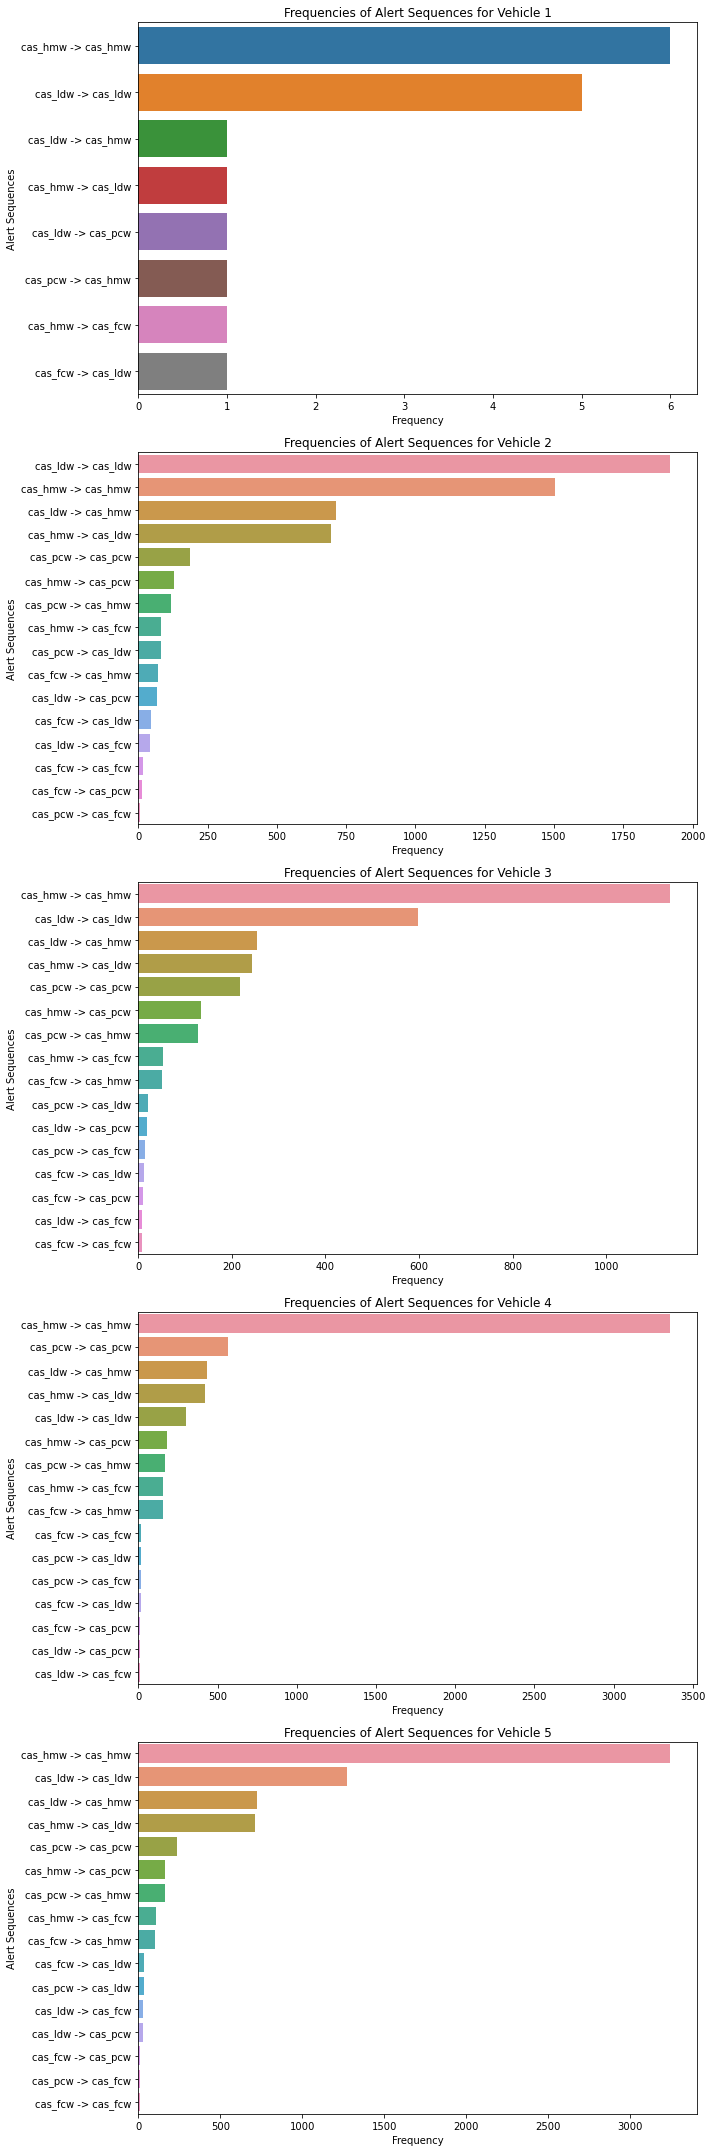

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def get_alert_sequences(data):
    data = data.sort_values(by="Datetime")
    sequences = []
    for i in range(len(data)-1):
        sequences.append(data['Alert'].iloc[i] + ' -> ' + data['Alert'].iloc[i+1])
    return sequences
num_vehicles = len(datasets)
fig, axes = plt.subplots(nrows=num_vehicles, figsize=(10, 6*num_vehicles))
for i, (data, ax) in enumerate(zip(datasets, axes)):
    vehicle_sequences = get_alert_sequences(data)
    sequence_counts = pd.Series(vehicle_sequences).value_counts()
    sns.barplot(y=sequence_counts.index, x=sequence_counts.values, orient="h", ax=ax)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Alert Sequences")
    ax.set_title(f"Frequencies of Alert Sequences for Vehicle {i+1}")
plt.tight_layout()
plt.show()

# Analysing if there is any anomaly present for vehicle number 1995

# Finding out when maximum number of alerts are triggered for each vehicle

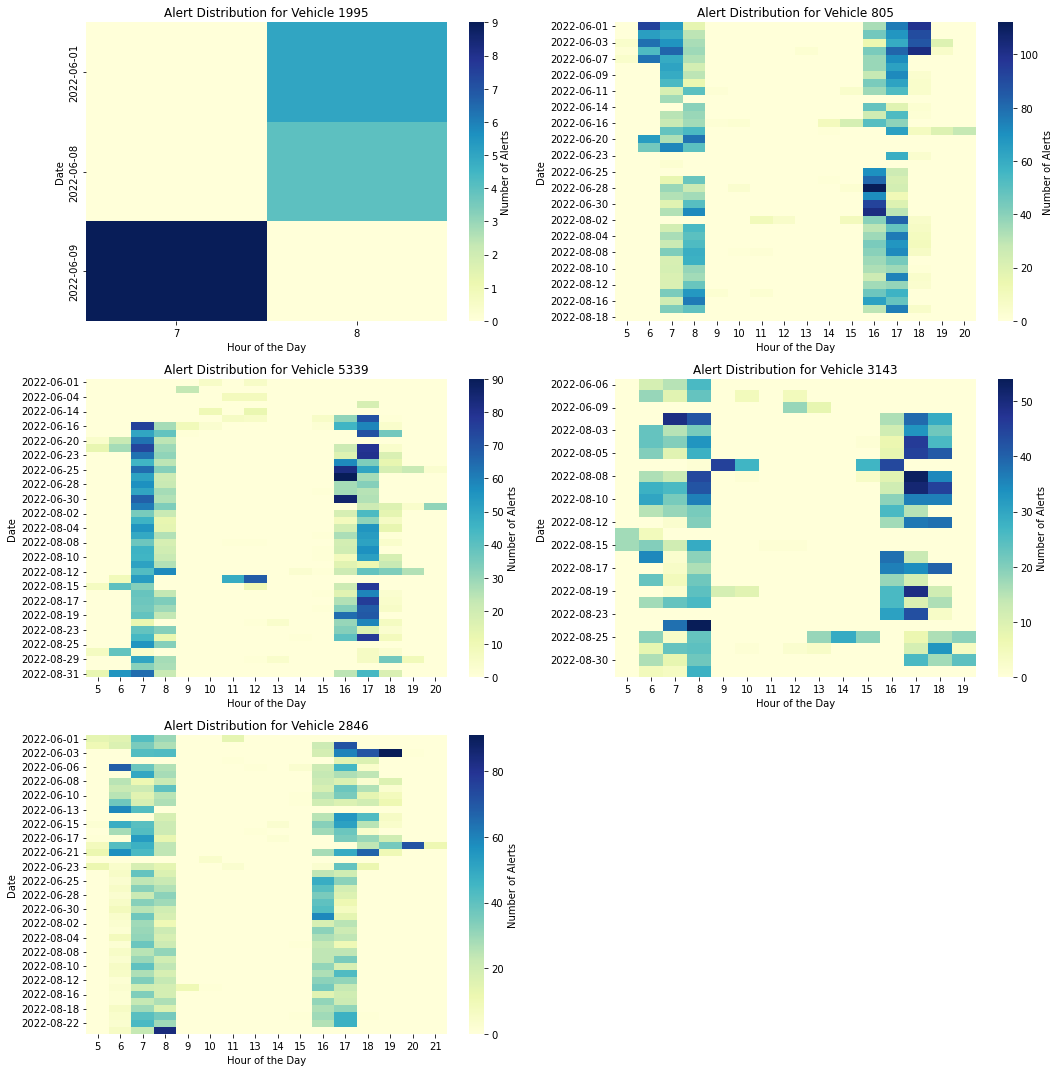

In [28]:
import numpy as np
combined_data['Date'] = combined_data['Datetime'].dt.date
combined_data['Hour'] = combined_data['Datetime'].dt.hour
vehicles = [1995, 805, 5339, 3143, 2846]
plt.figure(figsize=(15, 15))
for i, vehicle_num in enumerate(vehicles):
    plt.subplot(3, 2, i+1)
    vehicle_data = combined_data[combined_data['Vehicle'] == vehicle_num]
    heatmap_data = vehicle_data.pivot_table(index='Date', columns='Hour', aggfunc='size', fill_value=0)
    sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Alerts'})
    plt.title(f"Alert Distribution for Vehicle {vehicle_num}")
    plt.ylabel('Date')
    plt.xlabel('Hour of the Day')
plt.tight_layout()
plt.show()

# Analysing why cas_hmw is high for all vehicles eventually checking if it was triggered the most in the daytime or night time

C:\Users\Thanya\AppData\Local\Temp\ipykernel_18924\1784754550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmw_data['Day_or_Night'] = hmw_data['Datetime'].apply(lambda x: 'Day' if 6 <= x.hour < 18 else 'Night')
C:\Users\Thanya\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Thanya\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


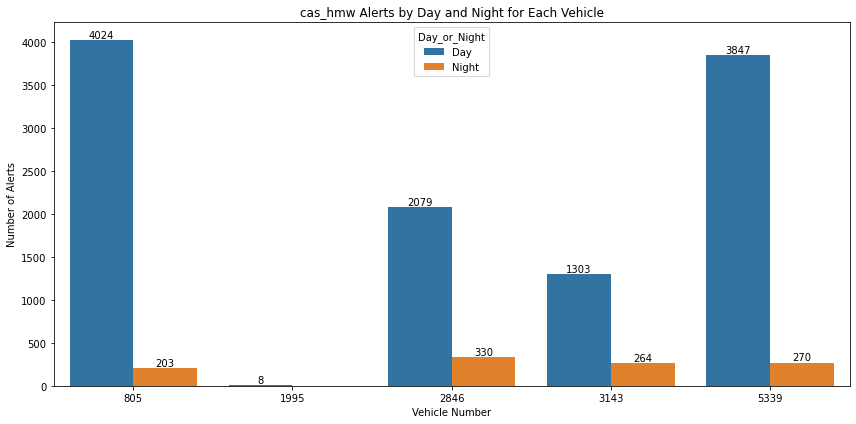

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hmw_data = combined_data[combined_data['Alert'] == 'cas_hmw']
hmw_data['Day_or_Night'] = hmw_data['Datetime'].apply(lambda x: 'Day' if 6 <= x.hour < 18 else 'Night')
grouped_hmw_data = hmw_data.groupby(['Vehicle', 'Day_or_Night']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_hmw_data, x='Vehicle', y='Count', hue='Day_or_Night')
plt.title('cas_hmw Alerts by Day and Night for Each Vehicle')
plt.ylabel('Number of Alerts')
plt.xlabel('Vehicle Number')
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Check if height is not NaN
        ax.annotate(f"{int(height)}", 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
plt.tight_layout()
plt.show()